In [4]:
%pip install geopandas

In [5]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap

In [6]:
df_events = pd.read_csv('/content/drive/MyDrive/Group project/cleaned_data/cleaned_street_food_and_folk_festivals.csv')
df_events

,district,from,to,time,entrance
0,Tempelhof-Schöneberg,01.05.2025,04.05.2025,Do/Fr/Sa 12:00 bis 23:00 Uhr \nSo 12:00 bis 20...,"Ja, findet auf der Straße statt"
1,Mitte,01.06.2025,NaN,11:00 bis 18:00 Uhr,Ja
2,Reinickendorf,01.08.2025,02.08.2025,Fr 15-22 Uhr \nSa 12-22 Uhr,Ja
3,Marzahn-Hellersdorf,02.05.2025,04.05.2025,Fr 16-22 Uhr Sa 12-22 Uhr So 12-18 Uhr,Ja
4,Treptow-Köpenick,02.10.2025,05.10.2025,Fr 12-22 Uhr Sa 12-22 Uhr So 12-20 Uhr,Ja
...,...,...,...,...,...
63,Friedrichshain-Kreuzberg,29.03.2025,30.03.2025,Sa 12-20 Uhr \nSo 12-18 Uhr,Ja
64,Reinickendorf,29.03.2025,04.05.2025,Montag und Dienstag geschlossen. Mittwoch und ...,Ja
65,Treptow-Köpenick,29.05.2025,01.06.2025,Fr 12-22 Uhr Sa 12-22 Uhr So 12-20 Uhr,Ja
66,Lichtenberg,29.05.2025,01.06.2025,12-22 Uhr,Ja


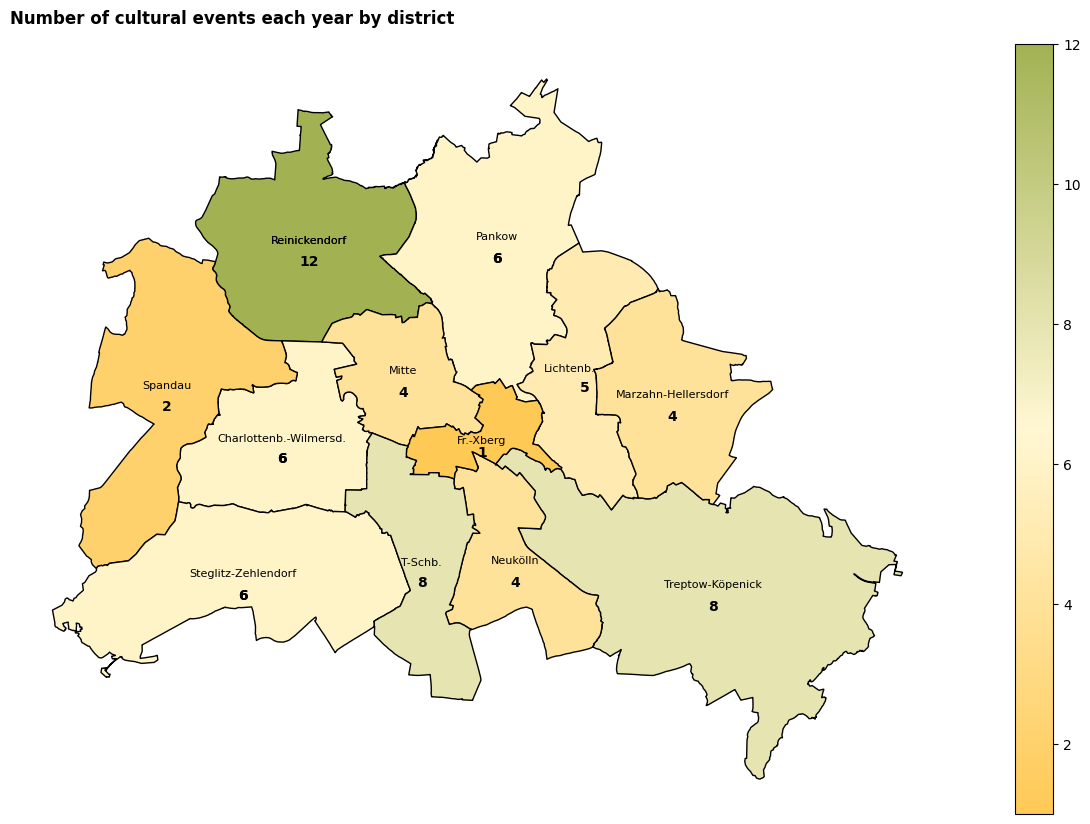

In [7]:
# Count events by district
event_counts = df_events['district'].value_counts().reset_index()
event_counts.columns = ['district', 'event_count']

#Map visualization 6 and 7
berlin = gpd.read_file("/content/drive/MyDrive/Group project/cleaned_data/berlin_district.geojson")

#  Data for each district
data = event_counts

# Merge data with GeoDataFrame
berlin = berlin.merge(data, left_on='Gemeinde_name', right_on='district', how='left')

#palette
custom_colors = ['#ffc955', '#fff7d3', '#a2b253']
custom_cmap = mcolors.LinearSegmentedColormap.from_list("my_cmap", custom_colors, N=256)
fig, ax = plt.subplots(figsize=(18,10))
berlin.plot(column='event_count', cmap=custom_cmap, edgecolor='black', legend=True, ax=ax)

# Add data labels to each district
for idx, row in berlin.iterrows():
    plt.annotate(text=row['event_count'] if pd.notnull(row['event_count']) else '0',
                 xy=(row.geometry.centroid.x, row.geometry.centroid.y - 0.01),
                 horizontalalignment='center', fontsize=10, color='black', weight='bold')

#Correct annotation color for Steglitz-Zehlendorf, Pankow and Charlottenburg-Wilmersdorf
for idx, row in berlin[berlin['Gemeinde_name'].isin(['Steglitz-Zehlendorf', 'Pankow', 'Charlottenburg-Wilmersdorf'])].iterrows():
    plt.annotate(text=row['event_count'] if pd.notnull(row['event_count']) else '0',
                 xy=(row.geometry.centroid.x, row.geometry.centroid.y - 0.01),
                 horizontalalignment='center', fontsize=10, color='black', weight='bold')

# District names
for idx, row in berlin.iterrows():
    if row['Gemeinde_name'] not in ['Tempelhof-Schöneberg', 'Friedrichshain-Kreuzberg', "Charlottenburg-Wilmersdorf", "Lichtenberg"]:
        plt.annotate(text=row['Gemeinde_name'], xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                    horizontalalignment='center', fontsize=8, color='black', weight='light', verticalalignment='bottom')

for idx, row in berlin[berlin['Gemeinde_name'].isin(['Reinickendorf'])].iterrows():
    plt.annotate(text=row['Gemeinde_name'], xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                 horizontalalignment='center', fontsize=8, color='black', weight='light', verticalalignment='bottom')

for idx, row in berlin[berlin['Gemeinde_name'] == 'Tempelhof-Schöneberg'].iterrows():
    plt.annotate(text='T-Schb.',
                xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                horizontalalignment='center', fontsize=8, color='black', weight='light')

for idx, row in berlin[berlin['Gemeinde_name'] == 'Friedrichshain-Kreuzberg'].iterrows():
    plt.annotate(text='Fr.-Xberg',
                xy=(row.geometry.centroid.x, row.geometry.centroid.y-0.004),
                horizontalalignment='center', fontsize=8, color='black', weight='light')

for idx, row in berlin[berlin['Gemeinde_name'] == 'Charlottenburg-Wilmersdorf'].iterrows():
    plt.annotate(text='Charlottenb.-Wilmersd.',
                xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                horizontalalignment='center', fontsize=8, color='black', weight='light')

for idx, row in berlin[berlin['Gemeinde_name'] == 'Lichtenberg'].iterrows():
    plt.annotate(text='Lichtenb.',
                xy=(row.geometry.centroid.x-0.012, row.geometry.centroid.y),
                horizontalalignment='center', fontsize=8, color='black', weight='light')

plt.title("Number of cultural events each year by district", pad = 15, loc = "left", weight = "bold")
plt.axis('off')
plt.show()



In [8]:
df_office = pd.read_csv('/content/drive/MyDrive/Group project/cleaned_data/cleaned_companies_grouped_by_district.csv')
df_office

,district,count
0,Charlottenburg-Wilmersdorf,1344
1,Friedrichshain-Kreuzberg,748
2,Lichtenberg,449
3,Marzahn-Hellersdorf,465
4,Mitte,1568
5,Neukölln,657
6,Pankow,1000
7,Reinickendorf,504
8,Spandau,444
9,Steglitz-Zehlendorf,900


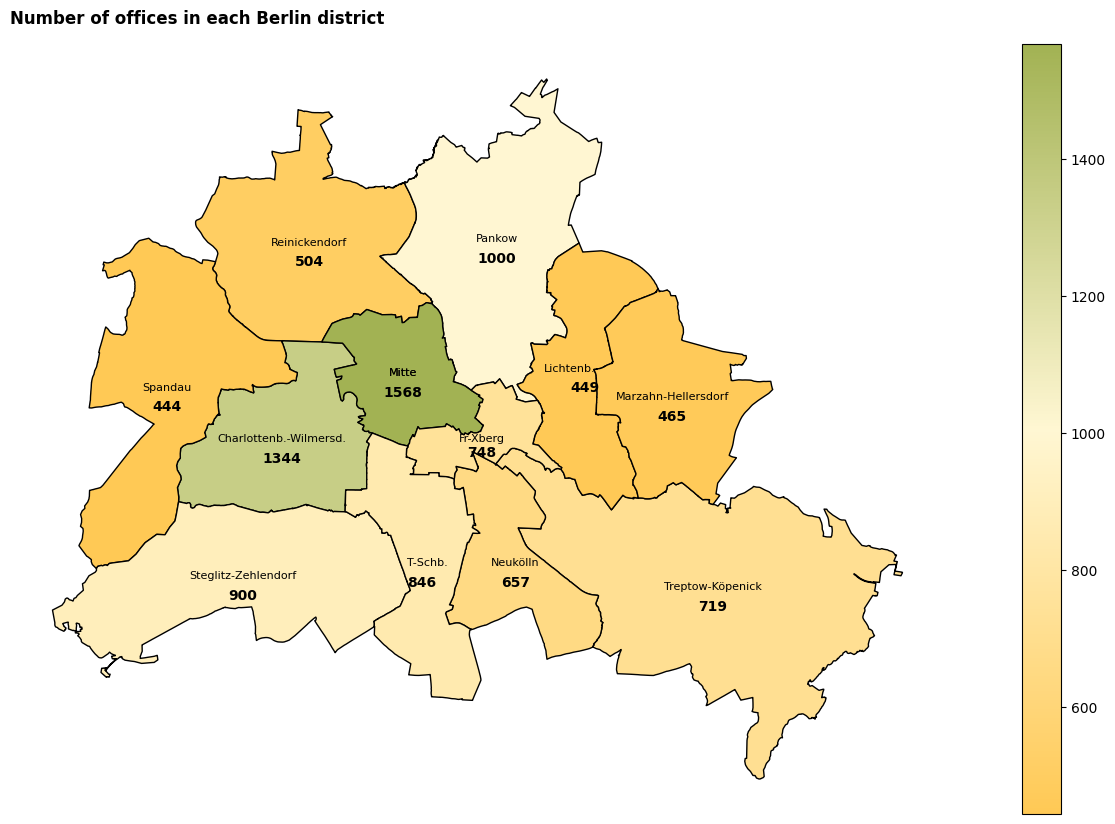

In [9]:
data_office = df_office
df_berlin_office = berlin.copy()
df_berlin_office = df_berlin_office.merge(data_office, left_on='Gemeinde_name', right_on='district', how='left')
df_berlin_office.drop(columns=['district_x', 'event_count', 'Gemeinde_name'], inplace=True)
df_berlin_office.rename(columns={'district_y': 'district', 'count': 'office_count'}, inplace=True)
df_berlin_office.head()

custom_colors = ['#9f242f', '#ffc955', '#fff7d3', '#a2b253', '#000000']
fig, ax = plt.subplots(figsize=(20,10))
df_berlin_office.plot(column='office_count', cmap=custom_cmap, edgecolor='black', legend=True, ax=ax)


#data labels
for idx, row in df_berlin_office.iterrows():
    plt.annotate(text=row['office_count'],
                 xy=(row.geometry.centroid.x, row.geometry.centroid.y - 0.01),
                 horizontalalignment='center', fontsize=10, color='black', weight='bold')

#custom data labels
for idx, row in df_berlin_office.iterrows():
    if row['district'] not in ['Tempelhof-Schöneberg', 'Friedrichshain-Kreuzberg', "Charlottenburg-Wilmersdorf", "Lichtenberg"]:
        plt.annotate(text=row['district'],
                    xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                    horizontalalignment='center', fontsize=8, color='black', weight='light')

#Customize annotations for color blind people
for idx, row in df_berlin_office[df_berlin_office['district'] == 'Mitte'].iterrows():
    plt.annotate(text=row['district'],
                xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                horizontalalignment='center', fontsize=8, color='black', weight='light')

for idx, row in df_berlin_office[df_berlin_office['district'] == 'Tempelhof-Schöneberg'].iterrows():
    plt.annotate(text='T-Schb.',
                xy=(row.geometry.centroid.x+0.004, row.geometry.centroid.y),
                horizontalalignment='center', fontsize=8, color='black', weight='light')

for idx, row in df_berlin_office[df_berlin_office['district'] == 'Charlottenburg-Wilmersdorf'].iterrows():
    plt.annotate(text='Charlottenb.-Wilmersd.',
                xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                horizontalalignment='center', fontsize=8, color='black', weight='light')

for idx, row in df_berlin_office[df_berlin_office['district'] == 'Lichtenberg'].iterrows():
    plt.annotate(text='Lichtenb.',
                xy=(row.geometry.centroid.x-0.012, row.geometry.centroid.y),
                horizontalalignment='center', fontsize=8, color='black', weight='light')

for idx, row in df_berlin_office[df_berlin_office['district'] == 'Friedrichshain-Kreuzberg'].iterrows():
    plt.annotate(text='Fr-Xberg',
                xy=(row.geometry.centroid.x, row.geometry.centroid.y-0.003),
                horizontalalignment='center', fontsize=8, color='black', weight='light')

plt.title("Number of offices in each Berlin district", pad = 15, loc = "left", weight = "bold")
plt.axis('off')
plt.show()

# Choice of cuisine and location
We used these plots in order to find a market gap in the Berlin restaurant market. Furthermore we visualised the density of restaurants in order to show potential for establishing a customer base. Lastly we show the distribution of cuisines in Berlin overall.

In [10]:
df_district = pd.read_csv('/content/drive/MyDrive/Group project/data/berlin_district_info.csv')
df_district.rename(columns={'pop_density': 'population_density', 'berlin_district': 'district'}, inplace=True)

In [11]:
df_restaurants_district_info = pd.read_csv('/content/drive/MyDrive/Group project/cleaned_data/cleaned_restaurants_and_district_info.csv')
df_restaurants_district_info = df_restaurants_district_info.rename(columns={"type_of_food": "Cuisine", "district": "District"}, errors="raise")

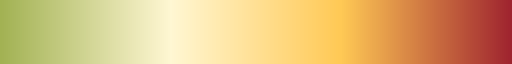

In [12]:
custom_colors_rev_2 = [
     "#a2b253","#fff7d3","#ffc955","#9f242f"
]
# Create a ListedColormap
custom_cmap2 = LinearSegmentedColormap.from_list("custom_gradient", custom_colors_rev_2)
custom_cmap2

In [13]:
(
    df_restaurants_district_info.groupby(['District', 'Cuisine'])['name']
      .count()
      .unstack()
      .fillna(0)
      .style
      .format("{:.0f}")
      .set_properties(**{
          'text-align': 'center',
          'padding': '8px',
          'border': '1px solid #ddd'
      })
      .set_table_styles([
          # Global table style
          {'selector': 'table', 'props': [
              ('font-family', "'Poppins', sans-serif"),
              ('background-color', '#000000'),
              ('border-collapse', 'collapse'),
              ('color', '#333'),
              ('text-align', 'center')
          ]},
         {'selector': 'th', 'props': [
              ('text-align', 'center'),
              ('font-weight', 'bold'),
              ('padding', '12px'),
              ('border', '1px solid #ddd')
          ]},
          # Data cells style
          {'selector': 'td', 'props': [
              ('border', '1px solid #ddd'),
              ('text-align', 'center')
          ]}
      ])
      .background_gradient(cmap=custom_cmap2, axis=None)
)

Cuisine,American,German,Hungarian,Indian,Italian,Korean,Mexican,Turkish,Vietnamese
District,,,,,,,,,
Charlottenburg-Wilmersdorf,81,123,5,30,74,21,21,56,64
Friedrichshain-Kreuzberg,36,45,13,34,53,17,24,34,52
Lichtenberg,19,24,2,5,20,5,0,19,31
Marzahn-Hellersdorf,22,20,1,8,10,6,2,20,21
Mitte,91,66,15,75,125,65,53,112,98
Neukölln,62,60,12,12,54,5,4,26,24
Pankow,63,42,3,18,47,12,8,43,54
Reinickendorf,17,37,4,6,30,3,4,21,25
Spandau,37,37,5,9,40,7,9,28,24


In [14]:
(
    df_restaurants_district_info.groupby(['District', 'Cuisine'])['name']
      .count()
      .unstack()
      .fillna(0)
      .style
      .format("{:.0f}")
      .set_properties(**{
          'text-align': 'center',
          'padding': '8px',
          'border': '1px solid #ddd'
      })
      .set_table_styles([
          # Global table style
          {'selector': 'table', 'props': [
              ('font-family', "'Poppins', sans-serif"),
              ('background-color', '#000000'),
              ('border-collapse', 'collapse'),
              ('color', '#333'),
              ('text-align', 'center')
          ]},
         {'selector': 'th', 'props': [
              ('text-align', 'center'),
              ('font-weight', 'bold'),
              ('padding', '12px'),
              ('border', '1px solid #ddd')
          ]},
          # Data cells style
          {'selector': 'td', 'props': [
              ('border', '1px solid #ddd'),
              ('text-align', 'center')
          ]}
      ])
    #   .background_gradient(cmap=custom_cmap2, axis=None)
      .apply(lambda x: ['background-color: #a2b253; color: white' if (x.name == 'Mexican' and v == 0) else '' for v in x],
             subset=['Mexican'])
)




Cuisine,American,German,Hungarian,Indian,Italian,Korean,Mexican,Turkish,Vietnamese
District,,,,,,,,,
Charlottenburg-Wilmersdorf,81,123,5,30,74,21,21,56,64
Friedrichshain-Kreuzberg,36,45,13,34,53,17,24,34,52
Lichtenberg,19,24,2,5,20,5,0,19,31
Marzahn-Hellersdorf,22,20,1,8,10,6,2,20,21
Mitte,91,66,15,75,125,65,53,112,98
Neukölln,62,60,12,12,54,5,4,26,24
Pankow,63,42,3,18,47,12,8,43,54
Reinickendorf,17,37,4,6,30,3,4,21,25
Spandau,37,37,5,9,40,7,9,28,24


In [15]:
df_restaurants = pd.read_csv('/content/drive/MyDrive/Group project/cleaned_data/cleaned_restaurants_and_district_info.csv')
df_restaurants.head()

,name,type_of_food,district,rating,total_ratings,price_level,takeout,delivery,dine_in,wheelchair_accessible_entrance,free_street_parking,population_density
0,Coréen Restaurant Berlin,Korean,Mitte,4.2,488,PRICE_LEVEL_MODERATE,True,False,True,False,False,10.08
1,Mmaah - Eat Korean!,Korean,Mitte,4.7,966,NO_PRICE_DATA,True,True,True,True,False,10.08
2,soopoollim,Korean,Mitte,4.8,412,NO_PRICE_DATA,True,True,True,False,False,10.08
3,YamYam Berlin,Korean,Mitte,4.3,3468,PRICE_LEVEL_MODERATE,True,True,True,False,False,10.08
4,Gippeum,Korean,Mitte,4.7,117,NO_PRICE_DATA,True,True,True,False,False,10.08


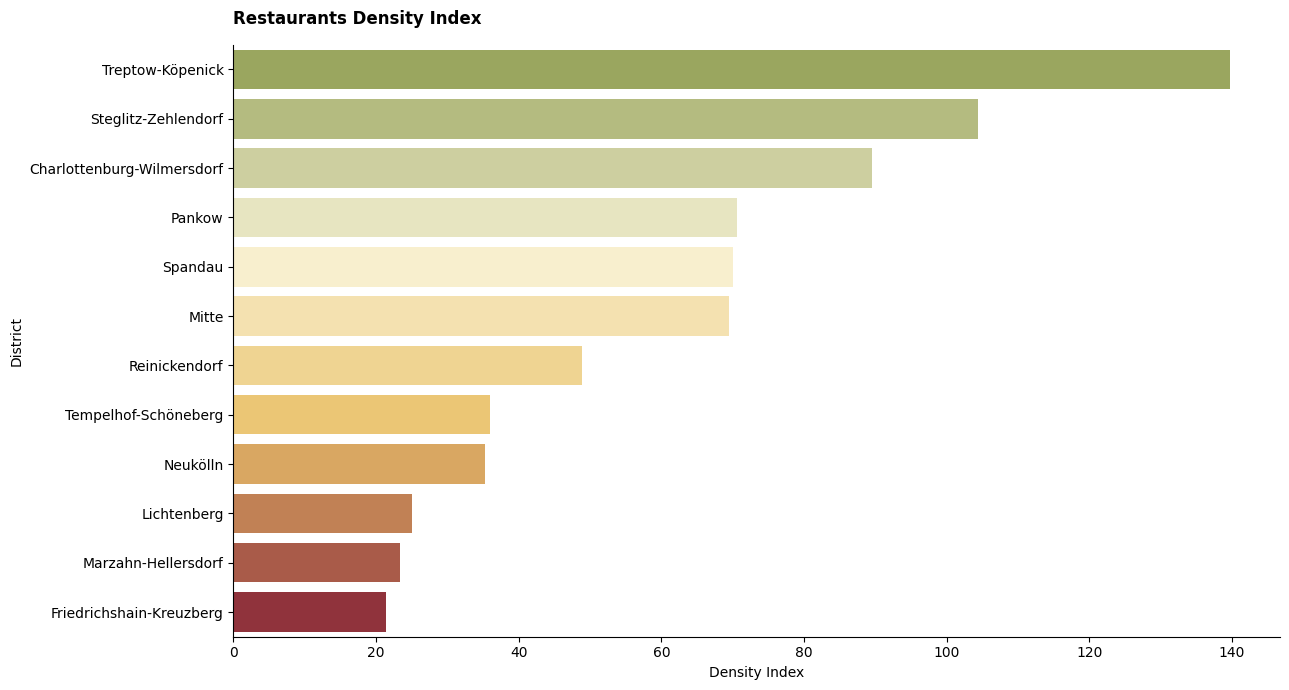

In [16]:
df_restaurants_by_district = df_restaurants.groupby(['district', 'type_of_food']).size().reset_index(name='count')
df_restaurants_by_district.head()

heatmap_data = df_restaurants_by_district.pivot(index='district', columns='type_of_food', values='count')

df_totals = heatmap_data.sum(axis=1).reset_index(name='total_restaurants')
df_totals.columns = ['district', 'total_restaurants']
df_totals['total_restaurants'].astype(int)

df_density = pd.merge(df_totals, df_district[['district', 'population_density']], on='district', how='left')
df_density['density'] = df_density['total_restaurants'] / df_density['population_density']

df_density = df_density.sort_values(by='density', ascending=False)

custom_colors_rev3 = ["#a2b253","#fff7d3","#ffc955","#9f242f"]

custom_cmap3 = LinearSegmentedColormap.from_list("custom_gradient", custom_colors_rev3)

n_districts = len(df_density)
colors = [custom_cmap3(i) for i in np.linspace(0, 1, n_districts)]

plt.figure(figsize=(13, 7))
sns.barplot(
    data=df_density,
    y='district',
    x='density',
    hue='district',
    palette=colors,
    legend=False
)
plt.title('Restaurants Density Index', pad = 15, loc = "left", weight = "bold")
plt.xlabel('Density Index')
plt.ylabel('District')
sns.despine()
plt.tight_layout()
plt.show()

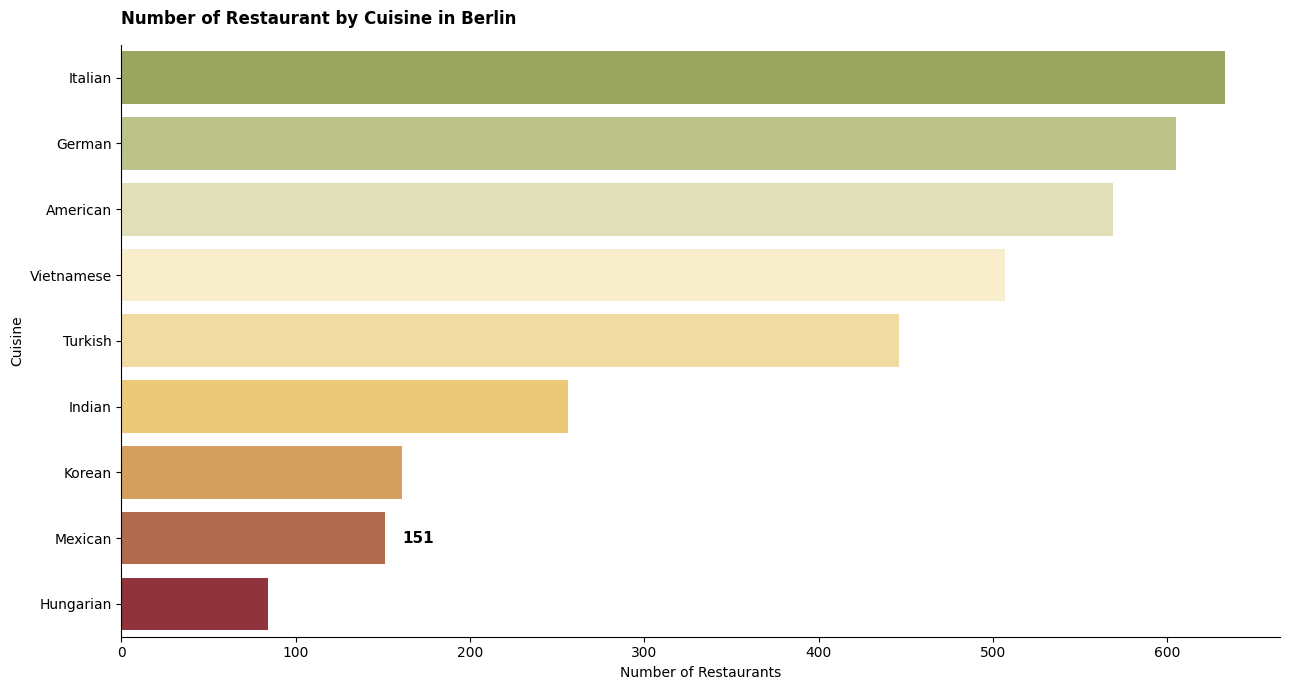

Number of Mexican restaurants in Berlin: 151


In [17]:
# Count restaurants by cuisine type
cuisine_counts = (
    df_restaurants
    .groupby('type_of_food')
    .size()
    .reset_index(name='count')
    .sort_values('count', ascending=False)
)

# custom_colors_rev = ["#a2b253","#fff7d3","#ffc955","#9f242f"]
custom_colors_rev4 = ["#9f242f","#ffc955","#fff7d3","#a2b253"]
custom_cmap4 = LinearSegmentedColormap.from_list("custom_gradient", custom_colors_rev4)

n_cuisines = len(cuisine_counts)
colors = [custom_cmap4(i / max(1, n_cuisines - 1)) for i in range(n_cuisines)]

plt.figure(figsize=(13,7))
sns.barplot(
    data=cuisine_counts,
    y='type_of_food',
    x='count',
    hue = 'count',
    legend= False,
    palette=colors
)
plt.title('Number of Restaurant by Cuisine in Berlin', fontweight='bold', pad = 15, loc = "left")
plt.xlabel('Number of Restaurants')
plt.ylabel('Cuisine')

for i, row in cuisine_counts.iterrows():
    if row['type_of_food'] == 'Mexican':
        plt.text(
            x=row['count'] + 10,
            y = i + 1,
            s=f"{row['count']}",
            va='center',
            ha='left',
            fontsize=11,
            color='black',
            fontweight='semibold'
        )
        break

plt.tight_layout()
sns.despine()
plt.show()

mexican_count = cuisine_counts[cuisine_counts['type_of_food'] == 'Mexican']['count'].iloc[0]
print(f"Number of Mexican restaurants in Berlin: {mexican_count}")


In [18]:
df_populartimes = pd.read_csv('/content/drive/MyDrive/Group project/cleaned_data/cleaned_populartimes.csv')
df_populartimes.head()

,day,hour,value
0,Friday,0,2.250000
1,Friday,1,0.294643
2,Friday,2,0.116071
3,Friday,3,0.000000
4,Friday,4,0.000000


# Strategy

In this section we explore Lichtenbergs restaurants and the customer behaviour by looking at popular times for dining.
Also we examine the average price level of the industry in order to make an informed decision on our business model and pricing strategy.

In [19]:
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
weekday_color = '#ffc955'
weekend_color = '#9f242f'

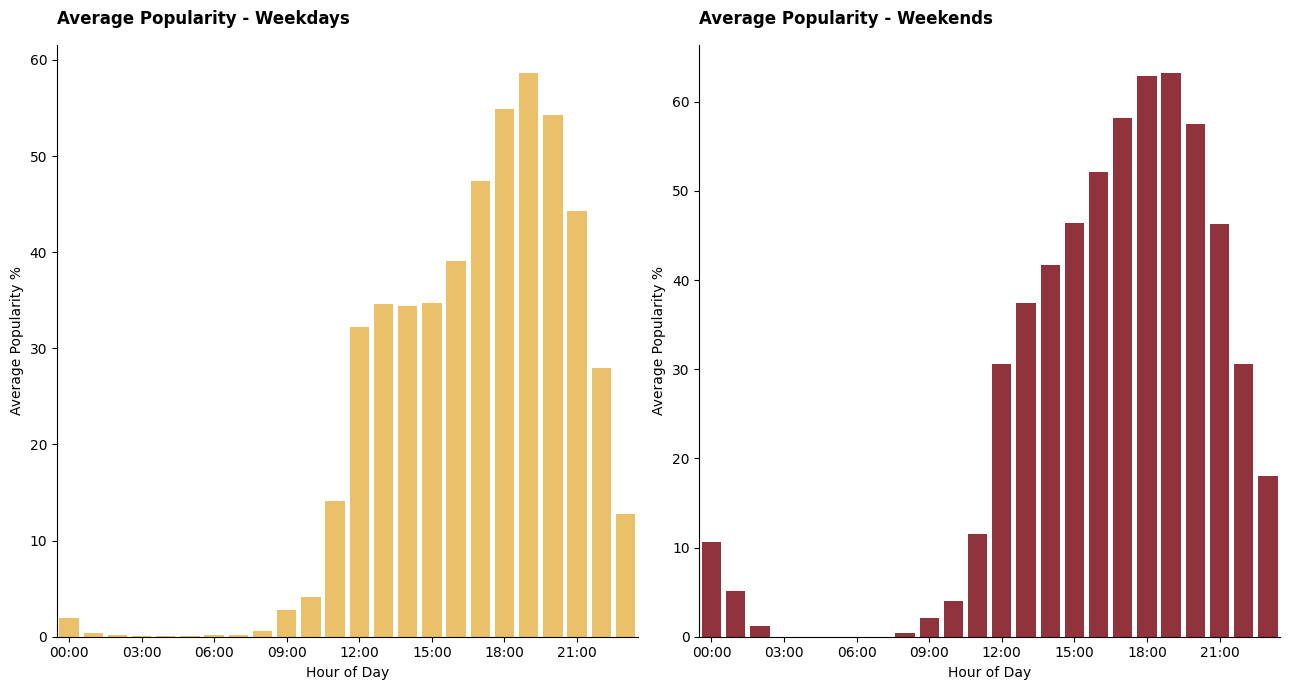

In [20]:

df_populartimes['day_type'] = df_populartimes['day'].apply(
    lambda x: 'Weekday' if x in weekdays else 'Weekend'
)

fig, axes = plt.subplots(1, 2, figsize=(13, 7))

# Weekdays
df_weekday = df_populartimes[df_populartimes['day_type'] == 'Weekday'].groupby(['hour'])['value'].mean().reset_index()
sns.barplot(data=df_weekday, x='hour', y='value', ax=axes[0], color=weekday_color)
axes[0].set_title('Average Popularity - Weekdays', fontweight='bold', pad = 15, loc = "left")
axes[0].set_xlabel('Hour of Day')
axes[0].set_ylabel('Average Popularity %')
axes[0].set_xticks(range(0, 24, 3))
axes[0].set_xticklabels([f'{int(h):02d}:00' for h in range(0, 24, 3)])

#Weekends
df_weekend = df_populartimes[df_populartimes['day_type'] == 'Weekend'].groupby(['hour'])['value'].mean().reset_index()
sns.barplot(data=df_weekend, x='hour', y='value', ax=axes[1], color=weekend_color)
axes[1].set_title('Average Popularity - Weekends', fontweight='bold', pad = 15, loc = "left")
axes[1].set_xlabel('Hour of Day')
axes[1].set_ylabel('Average Popularity %')
axes[1].set_xticks(range(0, 24, 3))
axes[1].set_xticklabels([f'{int(h):02d}:00' for h in range(0, 24, 3)])

sns.despine()
plt.tight_layout()
plt.show()

In [21]:
df = pd.read_csv("/content/drive/MyDrive/Group project/cleaned_data/cleaned_restaurants_and_district_info.csv")
df.head(10)

,name,type_of_food,district,rating,total_ratings,price_level,takeout,delivery,dine_in,wheelchair_accessible_entrance,free_street_parking,population_density
0,Coréen Restaurant Berlin,Korean,Mitte,4.2,488,PRICE_LEVEL_MODERATE,True,False,True,False,False,10.08
1,Mmaah - Eat Korean!,Korean,Mitte,4.7,966,NO_PRICE_DATA,True,True,True,True,False,10.08
2,soopoollim,Korean,Mitte,4.8,412,NO_PRICE_DATA,True,True,True,False,False,10.08
3,YamYam Berlin,Korean,Mitte,4.3,3468,PRICE_LEVEL_MODERATE,True,True,True,False,False,10.08
4,Gippeum,Korean,Mitte,4.7,117,NO_PRICE_DATA,True,True,True,False,False,10.08
5,Wondeo Chikin - Korean Fried Chicken Halal,Korean,Mitte,4.4,696,NO_PRICE_DATA,True,True,True,False,False,10.08
6,youngheene,Korean,Mitte,4.5,205,NO_PRICE_DATA,True,True,True,False,False,10.08
7,MODU Korean Bistro,Korean,Mitte,5.0,85,NO_PRICE_DATA,False,True,True,False,False,10.08
8,GochuGang,Korean,Mitte,5.0,2,NO_PRICE_DATA,True,True,True,False,False,10.08
9,Han Factory,Korean,Mitte,4.7,1905,NO_PRICE_DATA,True,True,True,True,False,10.08


In [26]:
df.price_level.unique()

array(['PRICE_LEVEL_MODERATE', 'NO_PRICE_DATA', 'PRICE_LEVEL_EXPENSIVE',
       'PRICE_LEVEL_INEXPENSIVE', 'PRICE_LEVEL_VERY_EXPENSIVE'],
      dtype=object)

In [27]:
df_Lichtenberg = df[(df["district"] == "Lichtenberg")][["price_level", "type_of_food", "rating"]]
df_Lichtenberg.head()

,price_level,type_of_food,rating
153,NO_PRICE_DATA,Korean,4.5
154,PRICE_LEVEL_MODERATE,Korean,4.7
155,PRICE_LEVEL_MODERATE,Korean,4.7
156,PRICE_LEVEL_MODERATE,Korean,4.8
157,NO_PRICE_DATA,Korean,4.9


In [28]:
df_Lichtenberg_clean = df_Lichtenberg[df_Lichtenberg["price_level"] != "NO_PRICE_DATA"]
df_Lichtenberg_clean.shape[0]

df_Lichtenberg = df[(df["district"] == "Lichtenberg")][["price_level", "type_of_food", "rating"]]
print(f"The number of rows in the uncleaned dataset is: {df_Lichtenberg.shape[0]}")

print(f"The number of rows in the cleaned dataset is: {df_Lichtenberg_clean.shape[0]}")
print("We can consequently only estimate the average price levels in the area.")

The number of rows in the uncleaned dataset is: 125
The number of rows in the cleaned dataset is: 67
We can consequently only estimate the average price levels in the area.


In [29]:
df_Lichtenberg_clean = df_Lichtenberg_clean.replace({'PRICE_LEVEL_MODERATE': "Moderate", 'PRICE_LEVEL_EXPENSIVE':"Expensive",
       'PRICE_LEVEL_INEXPENSIVE': "Inexpensive", 'PRICE_LEVEL_VERY_EXPENSIVE':"Very Expensive"})

custom_order = ["Inexpensive", "Moderate", "Expensive", "Very Expensive"]
df_Lichtenberg_clean["price_level"] = pd.Categorical(df_Lichtenberg_clean["price_level"], custom_order)

/tmp/ipython-input-1547347624.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_ratings = pd.DataFrame(df_Lichtenberg_clean.groupby("price_level")["rating"].agg("mean")).rename(columns = {"rating": "average_rating"})


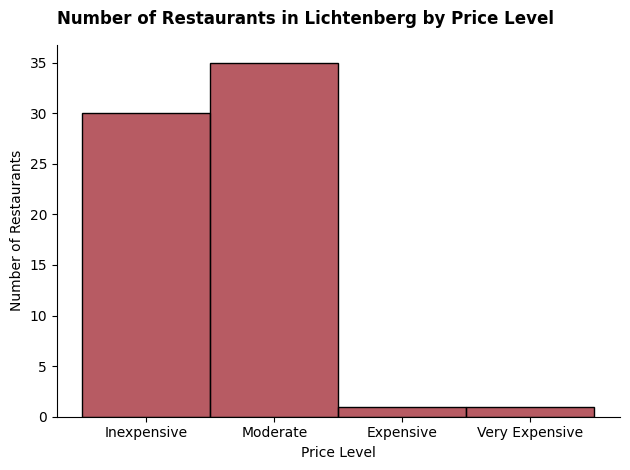

In [30]:
average_ratings = pd.DataFrame(df_Lichtenberg_clean.groupby("price_level")["rating"].agg("mean")).rename(columns = {"rating": "average_rating"})
average_ratings

sns.histplot(x = "price_level", data= df_Lichtenberg_clean, color = "#9f242f");

plt.title("Number of Restaurants in Lichtenberg by Price Level", pad = 15, fontweight="bold", loc = "left")
plt.xlabel("Price Level")
plt.ylabel("Number of Restaurants")

sns.despine()
plt.tight_layout()
plt.show()